# Sure Tomorrow: insurance business analysis

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and we will evaluate that possibility throughout this project.



## Data Description

- Features: insured person's gender, age, salary, and number of family members.
- Target: number of insurance benefits received by an insured person over the last five years.


## Statement

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. We won't need to pick the best model, just prove that the algorithm works correctly.


# Data Preprocessing & Exploration

## Initialization

In [1]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display
from scipy.spatial import distance

from sklearn.neighbors import NearestNeighbors

from sklearn.utils import shuffle

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
# Load dataset into a Dataframe
try:
    df=pd.read_csv('c:/Users/josef/Practicum/Linear algebra/insurance_us.csv')
except:
    df = pd.read_csv('/datasets/insurance_us.csv')
    

In [4]:
#print first rows
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
#Print general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
#check for duplicates
df.duplicated().sum()

153

In [7]:
# assess duplicates %

df.duplicated().sum()/len(df)

0.0306

## Raw data overview:

From the first data overview, we conclude that before moving on with the analysis, we need to perform the following fixes:

1) Columns need to be renamed, removing upper cases and applying the snake_case syntax.

2) 3% of the observations are duplicated, so we'll drop them out.

3) Age dtype will be changed from float to integer.



There are no missing values in the dataset, and no other issue has been detected


### 1) Rename columns

In [8]:
#rename columns: remove upper cases and apply snake_case syntax
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

### 2) Remove duplicates

In [9]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.tail()

,gender,age,income,family_members,insurance_benefits
4842,0,28.0,35700.0,2,0
4843,0,34.0,52400.0,1,0
4844,0,20.0,33900.0,2,0
4845,1,22.0,32700.0,3,0
4846,1,28.0,40600.0,1,0


### 3) Fix age data type

In [10]:
# Fix the age type (from float to int) 
df['age'] = df['age'].astype('int')


In [11]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4847 non-null   int64  
 1   age                 4847 non-null   int32  
 2   income              4847 non-null   float64
 3   family_members      4847 non-null   int64  
 4   insurance_benefits  4847 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 170.5 KB


Now that general fixes have been carried out, we'll take a look at the dataset descriptive statistics

In [12]:
# Have a look at the data's descriptive statistics. 
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [13]:
#check gender distribution

df['gender'].value_counts()/len(df)

0    0.501547
1    0.498453
Name: gender, dtype: float64

In [14]:
#check family members distribution
df['family_members'].value_counts()/len(df)

1    0.360635
0    0.301424
2    0.214153
3    0.090159
4    0.025583
5    0.006602
6    0.001444
Name: family_members, dtype: float64

In [15]:
##check insurance benefits distribution
df['insurance_benefits'].value_counts()/len(df)

0    0.883846
1    0.087270
2    0.023520
3    0.003714
4    0.001444
5    0.000206
Name: insurance_benefits, dtype: float64

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

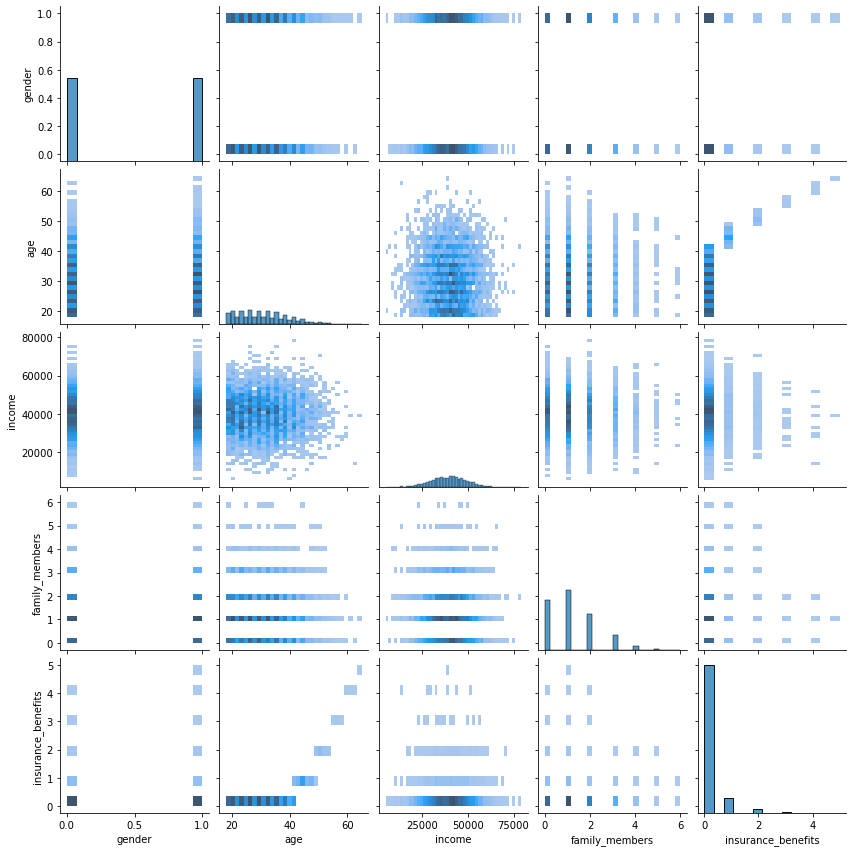

In [16]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

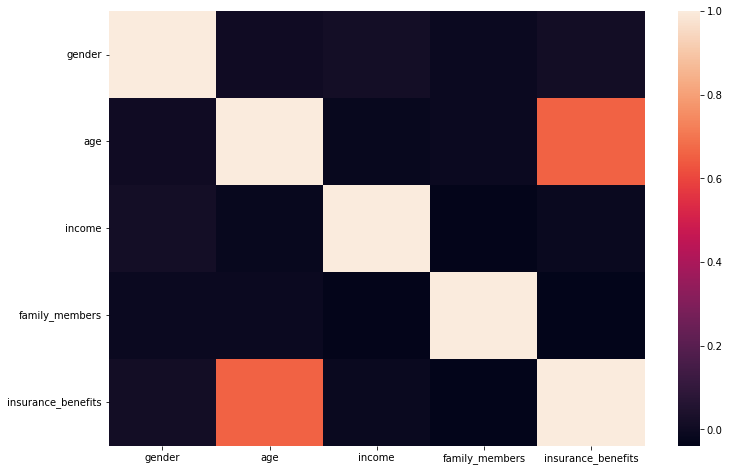

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.show()

## General observations:

1) An 88% of the population has never received an insurance benefit. Only a 0.2% accounts for the maximum of 5 benefits.

2) Large families (3-6 members) have received a maximum of 2 insurance benefits, whereas those composed by up to two members are the ones who achieved the highest count of benefits (4-5 times). However, we must highlight that families with 3+ members account for only a 13% of the dataset, so the aforementioned conclusion might be biased for their lack of representation within the dataset.

3) Age seems to be determinant: from both the pairplot and the heatmap, we can deduct that the oldest the person is, the more benefits s/he might have received.

4) Gender and income do not seem to have a notorious correlation to the amount of benefits received.




Apart from the abovementioned, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's why we'll use LA and ML to systematically try to draw reliable conclusions.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects. As said above, this aims to help the company's agents with marketing.

The objective is to write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits will not be taken into account for this task. 

Moreover, we'll first create a Custom ML class to figure out how the logic works from the inside out, and then compare it to the result provided by a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)).

Later on, we will test it for four combination of two cases:

- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
  
- Distance Metrics
  - Euclidean
  - Manhattan

Finally, we will answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [18]:
#select every field but insurance_benefits
feature_names = ['gender', 'age', 'income', 'family_members']

#### Task 1) a) Create a custom ML class with the method "knn", which takes: 

- A dataframe
- k= count of nearest neighbors to retrieve from the dataset 
- n= row index of the observation which nearest neighbors we want to get.

And returns a df with the K nearest neighbors of the observation of index n, and their (manhattan/euclidean) distance to such observation

In [19]:
#Create a custom ML class to return the k nearest neighbors of the nth observation within the dataset
class nearest_neighbor():
       
    #define knn method
    def knn(self, df, n, k, metric='euclidean'):
        
        """
        Returns k nearest neighbors

        :param df: pandas DataFrame used to find similar objects within
        :param n: object no for which the nearest neighbours are looked for
        :param k: the number of the nearest neighbours to return
        :param metric: name of distance metric
        """
        new_features=df.loc[n,feature_names].values
        train_df=df.loc[:,feature_names]
        distances=[]
        for i in range(len(df)):
            feature_vector= train_df.iloc[i].values
            if metric=='euclidean':
                feature_distance= sum((new_features-feature_vector)**2)**0.5
            elif metric=='manhattan':
                feature_distance= sum(abs(new_features-feature_vector))
            distances.append(feature_distance)

        closest_index= np.array(distances).argsort()[:k] 
        distance_df=pd.DataFrame(np.array([distances]).T, columns= ['distance'])
        nearest_neigh= pd.concat([df.loc[closest_index,:], distance_df.loc[closest_index,:]], axis=1)
        return nearest_neigh

In [20]:
#create a model of the previously defined class
nrr= nearest_neighbor()

#get the 10 closest neighbors of the 3rd observation based on euclidean distance
top_ten_euclidean_homemade= nrr.knn(df,2,10)

#print them out
top_ten_euclidean_homemade

,gender,age,income,family_members,insurance_benefits,distance
2,0,29,21000.0,0,0,0.000000
4407,1,31,21000.0,1,0,2.449490
2001,0,30,20900.0,0,0,100.005000
1717,1,28,21100.0,0,0,100.010000
4656,0,28,21100.0,2,0,100.024997
2693,1,27,21100.0,1,0,100.029996
3740,1,35,21100.0,2,0,100.204790
1745,1,38,20900.0,2,0,100.429079
3931,0,39,20900.0,1,0,100.503731
2733,0,40,21100.0,0,0,100.603181


In [21]:
#get the 10 closest neighbors of the 3rd observation based on manhattan distance
top_ten_manhattan_homemade= nrr.knn(df,2,10,'manhattan')
#print them out
top_ten_manhattan_homemade

,gender,age,income,family_members,insurance_benefits,distance
2,0,29,21000.0,0,0,0.0
4407,1,31,21000.0,1,0,4.0
2001,0,30,20900.0,0,0,101.0
1717,1,28,21100.0,0,0,102.0
4656,0,28,21100.0,2,0,103.0
2693,1,27,21100.0,1,0,104.0
3740,1,35,21100.0,2,0,109.0
3931,0,39,20900.0,1,0,111.0
2733,0,40,21100.0,0,0,111.0
1745,1,38,20900.0,2,0,112.0


#### Task 1) b) Compare it to the result provided by a ready implementation of the kNN algorithm from scikit-learn

In [22]:
#define a function that returns the k closest neighbors of the nth observation from a dataframe
#using a pre-defined ML classifier.

def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    # Create an object of class nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    
    #define train df (excluding target)
    train_df=df.loc[:,feature_names].values
    
    #fit the train df to the object
    nbrs.fit(train_df)
     
    #index and distances of the k closest observations
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    #create df filtering out the index of the k closest observations, and appending their distance to the target obs
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [23]:
#get the 10 closest neighbors of the 3rd observation based on euclidean distance
top_ten_euclidean_takeaway= get_knn(df,2,10,'euclidean')

#print them out
top_ten_euclidean_takeaway

,gender,age,income,family_members,insurance_benefits,distance
2,0,29,21000.0,0,0,0.000000
4407,1,31,21000.0,1,0,2.449490
2001,0,30,20900.0,0,0,100.005000
1717,1,28,21100.0,0,0,100.010000
4656,0,28,21100.0,2,0,100.024997
2693,1,27,21100.0,1,0,100.029996
3740,1,35,21100.0,2,0,100.204790
1745,1,38,20900.0,2,0,100.429079
3931,0,39,20900.0,1,0,100.503731
2733,0,40,21100.0,0,0,100.603181


In [24]:
#get the 10 closest neighbors of the 3rd observation based on manhattan distance
top_ten_manhattan_takeaway= get_knn(df,2,10,'manhattan')

#print them out
top_ten_manhattan_takeaway

,gender,age,income,family_members,insurance_benefits,distance
2,0,29,21000.0,0,0,0.0
4407,1,31,21000.0,1,0,4.0
2001,0,30,20900.0,0,0,101.0
1717,1,28,21100.0,0,0,102.0
4656,0,28,21100.0,2,0,103.0
2693,1,27,21100.0,1,0,104.0
3740,1,35,21100.0,2,0,109.0
3931,0,39,20900.0,1,0,111.0
2733,0,40,21100.0,0,0,111.0
1745,1,38,20900.0,2,0,112.0


In [25]:
#Check there's no differences between the custom class and the ready implementation (euclidean distances)
(top_ten_euclidean_homemade==top_ten_euclidean_takeaway).sum()-len(top_ten_euclidean_homemade)

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
distance              0
dtype: int64

In [26]:
#Check there's no differences between the custom class and the ready implementation (manhattan distances)
(top_ten_manhattan_homemade==top_ten_manhattan_takeaway).sum()-len(top_ten_manhattan_takeaway)

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
distance              0
dtype: int64

#### It worked! Now we know out custom ML class works correctly.

Next, we'll scale the data and see if the closest neighbors retrieved change

In [27]:
#fit train df (excluding target) to the scaler
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

#scale the features and store in separate df
df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [28]:
#print 5 random rows
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3793,1.0,0.369231,0.612658,0.000000,0
3298,1.0,0.446154,0.529114,0.166667,0
3406,0.0,0.353846,0.624051,0.166667,0
544,1.0,0.538462,0.656962,0.333333,0
2383,0.0,0.307692,0.350633,0.000000,0


Now, let's get similar records for a given one for every combination

In [29]:
#get 10 closest records for df scaled - euclidean
top_ten_euclidean_scaled=nrr.knn(df_scaled,2,10)
top_ten_euclidean_scaled

,gender,age,income,family_members,insurance_benefits,distance
2,0.0,0.446154,0.265823,0.0,0,0.000000
507,0.0,0.446154,0.255696,0.0,0,0.010127
224,0.0,0.446154,0.277215,0.0,0,0.011392
2001,0.0,0.461538,0.264557,0.0,0,0.015437
645,0.0,0.461538,0.289873,0.0,0,0.028550
3083,0.0,0.446154,0.308861,0.0,0,0.043038
2778,0.0,0.415385,0.235443,0.0,0,0.043240
4755,0.0,0.492308,0.259494,0.0,0,0.046586
2036,0.0,0.492308,0.275949,0.0,0,0.047252
4079,0.0,0.446154,0.318987,0.0,0,0.053165


In [30]:
#check there're no differences between custom and pre-set model
(get_knn(df_scaled,2,10,'euclidean')==top_ten_euclidean_scaled).sum()-len(nrr.knn(df_scaled,2,10))

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
distance              0
dtype: int64

In [31]:
#get 10 closest records for df scaled - manhattan
top_ten_manhattan_scaled=nrr.knn(df_scaled,2,10,'manhattan')
top_ten_manhattan_scaled

,gender,age,income,family_members,insurance_benefits,distance
2,0.0,0.446154,0.265823,0.0,0,0.000000
507,0.0,0.446154,0.255696,0.0,0,0.010127
224,0.0,0.446154,0.277215,0.0,0,0.011392
2001,0.0,0.461538,0.264557,0.0,0,0.016650
645,0.0,0.461538,0.289873,0.0,0,0.039435
3083,0.0,0.446154,0.308861,0.0,0,0.043038
4755,0.0,0.492308,0.259494,0.0,0,0.052483
4079,0.0,0.446154,0.318987,0.0,0,0.053165
2036,0.0,0.492308,0.275949,0.0,0,0.056280
2778,0.0,0.415385,0.235443,0.0,0,0.061149


In [32]:
#check there're no differences between custom and pre-set mod
(get_knn(df_scaled,2,10,'manhattan')==top_ten_manhattan_scaled).sum()-len(nrr.knn(df_scaled,2,10))

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
distance              0
dtype: int64

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

To answer to that question we will print out any differences in the nearest neighbors returned for the scaled and non-scaled data, compare it to the observation whose knn we searched, and try to understand what are these divergencies due to (if any).

In [33]:
#print out observation which closest neighbors we looked for
df[df.index==2]

,gender,age,income,family_members,insurance_benefits
2,0,29,21000.0,0,0


In [34]:
#print records that are retrieved when using the original dataset, but not with the scaled one
top_ten_euclidean_homemade[top_ten_euclidean_homemade.index.isin(list(top_ten_euclidean_scaled.index))==False]

,gender,age,income,family_members,insurance_benefits,distance
4407,1,31,21000.0,1,0,2.449490
1717,1,28,21100.0,0,0,100.010000
4656,0,28,21100.0,2,0,100.024997
2693,1,27,21100.0,1,0,100.029996
3740,1,35,21100.0,2,0,100.204790
1745,1,38,20900.0,2,0,100.429079
3931,0,39,20900.0,1,0,100.503731
2733,0,40,21100.0,0,0,100.603181


In [35]:
#print records that are retrieved when using the scaled dataset, but not with the original one
df[(df.index.isin(list(top_ten_euclidean_homemade.index))==False) & (df.index.isin(list(top_ten_euclidean_scaled.index)))]

,gender,age,income,family_members,insurance_benefits
224,0,29,21900.0,0,0
507,0,29,20200.0,0,0
645,0,30,22900.0,0,0
2036,0,32,21800.0,0,0
2778,0,27,18600.0,0,0
3083,0,29,24400.0,0,0
4079,0,29,25200.0,0,0
4755,0,32,20500.0,0,0


In [36]:
#print records that are retrieved when using the original dataset, but not with the scaled one
top_ten_manhattan_homemade[top_ten_manhattan_homemade.index.isin(list(top_ten_manhattan_scaled.index))==False]

,gender,age,income,family_members,insurance_benefits,distance
4407,1,31,21000.0,1,0,4.0
1717,1,28,21100.0,0,0,102.0
4656,0,28,21100.0,2,0,103.0
2693,1,27,21100.0,1,0,104.0
3740,1,35,21100.0,2,0,109.0
3931,0,39,20900.0,1,0,111.0
2733,0,40,21100.0,0,0,111.0
1745,1,38,20900.0,2,0,112.0


In [37]:
#print records that are retrieved when using the scaled dataset, but not with the original one
df[(df.index.isin(list(top_ten_manhattan_homemade.index))==False) & (df.index.isin(list(top_ten_manhattan_scaled.index)))]

,gender,age,income,family_members,insurance_benefits
224,0,29,21900.0,0,0
507,0,29,20200.0,0,0
645,0,30,22900.0,0,0
2036,0,32,21800.0,0,0
2778,0,27,18600.0,0,0
3083,0,29,24400.0,0,0
4079,0,29,25200.0,0,0
4755,0,32,20500.0,0,0


In [38]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Clearly, not scaling the data hits the results retrieved by the kNN Algorithm. For both metrics, euclidean and manhattan distance, we got 8 differences out of 10 records (note that one of the 2 matches is the row whose closest neighbors we're looking for).

This is because when the data is not scaled, differences in income make the total difference of the row much higher than differences in gender, age or family members (as the values range from 5,300 to 79,000). 

When printing out differences, we can see that at the time of using the scaled dataframe, many of the records detected as close neighbors have a larger difference in the income value [Income = 18,600 to 25,200]  (as compared to row 2) than the ones retrieved when using the original dataframe [Income = 20,900 to 21,100] (non-scaled).

Definetly, using a scaled dataframe is prooved to be more effective, as it allows for every feature to have the same weight at the time of making a decision.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 


In [39]:
#print records that are retrieved when using manhattan distance (non-scaled dataset), but not with euclidean
df[(df.index.isin(list(top_ten_euclidean_homemade.index))==False) & (df.index.isin(list(top_ten_manhattan_homemade.index)))]

,gender,age,income,family_members,insurance_benefits


In [40]:
#print records that are retrieved when using manhattan distance (scaled dataset), but not with euclidean
df[(df.index.isin(list(top_ten_euclidean_scaled.index))==False) & (df.index.isin(list(top_ten_manhattan_scaled.index)))]

,gender,age,income,family_members,insurance_benefits


Even though there are some differences in the position at which the last rows are returned (meaning that if we printed out the top 8 closest neighbors instead of 10, we'd have some differences), the 10 closest records returned are the same for both metrics.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

# Task 2.a) F1 score assessment with kNN from 1 to 10

First step will consist of building a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. 

The point is to see how k may influence the evaluation metric, and whether scaling the data makes any difference. 

We will build a custom model, compare its results to the ones issued by a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)), and if it proves to work correctly, we'll assess the f1 score using the self-built model.

We will split the whole data in the 70:30 proportion for the training/testing parts.

In terms of machine learning we can look at this like a binary classification task: did the customer receive any insurance benefit or not?
We'll add a column to the dataset set to 1 (True) if insurance benefits is > 0 or to 0 (False) otherwise.

In [41]:
# calculate the target (1 if the client received 1+ insurance benefits or 0 otherwise)
df['insurance_benefits_received'] = df['insurance_benefits'].apply(lambda x: int(x>0))

#check that every customer with 1+ insurance benefits received was assigned a 1
df[df['insurance_benefits']>0]['insurance_benefits_received'].unique()

array([1], dtype=int64)

In [42]:
# check for the class imbalance with value_counts()
df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

We can see that users who ever received an insurance benefit represent a low percentage of the total samples. Next we'll create a Custom KNN based classifier to predict whether a customer is likely to receive any insurance benefit, based on whether it's closest neighbors in the dataset did so or not (the result that gets the majority of votes among the nearest neighbors target will be applied).Finally, ee'll evaluate it's performance through the f1 score before fixing class imbalance

We'll split the dataset into train and test (70:30 proportion)

In [43]:
#split into train and test features and target
X= df[feature_names]
Y= df['insurance_benefits_received'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=12345)



In [44]:
#fit train df (excluding target) to the scaler
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(X_train)

#scale the features and store in separate array
X_train_scaled_array = transformer_mas.transform(X_train)
X_test_scaled_array = transformer_mas.transform(X_test)

In [45]:
#store arrays in dataframes using same index as target dfs
X_train_scaled= pd.DataFrame(X_train_scaled_array, columns=feature_names, index=Y_train.index)
X_test_scaled=pd.DataFrame(X_test_scaled_array, columns=feature_names,index=Y_test.index)

Now we'll define a class with a method for making predictions based on customers with similar characteristics. We will use the euclidean distance for picking the closest neighbors.

In [46]:
#Create a custom kNN classifier
class KnnClassifier():
    
    def __init__(self,k):
    
        self.k = k

    def fit(self, features_train, target_train):
        self.features_train = features_train.reset_index(drop=True).values
        self.target_train = target_train.reset_index(drop=True)

    def predict(self, features_test):
        features_test=features_test.reset_index(drop=True)
        values = []
        
        for i in range(len(features_test)):
            features_test_vector = features_test.iloc[i].values
            distances= np.sum((self.features_train-features_test_vector)**2, axis=1)**0.5
            
            closest_indexes= distances.argsort()[:self.k]
            #get the corresponding target for such indexes
            target_nn= self.target_train.loc[closest_indexes]
            #return the prediction for that observation as the one that got the majority of votes

            pred= target_nn.mode()[0]
            values.append(pred)
        return pd.Series(values)
    

In [47]:
#Make sure the predictions match the ones made with a ready implementation model
model = KnnClassifier(k=2)
model.fit(X_train, Y_train)
pred_ok=model.predict(X_test)
pred_ok.value_counts()

0    1408
1      47
dtype: int64

In [48]:
#Compare results to the ones of the pre-defined kNN classifier
pre_defined_model=  sklearn.neighbors.KNeighborsClassifier(n_neighbors=2, metric='euclidean')
pre_defined_model.fit(X_train, Y_train)
Y_pred= pd.Series(pre_defined_model.predict(X_test))
Y_pred.value_counts()

0    1407
1      48
dtype: int64

Now that we ensured the custom model works correctly, we'll define a function to test its performance throughout the f1 score achieved using k neighbors from 1 to 10 to make predictions

In [49]:
#function to plot f1 score achieved by the model when making predictions based on kNN from 1 to 10
def plot_f1_score(X_train, X_test, Y_train, Y_test):
    ''' 
    Takes training and test features and target and
    plots f1 score achieved by a kNN Classifier model
    making predictions based on the k Nearest neighbors(from 1 to 10)'''
    
    #empty list to store scored achieved with each k 
    f1_scores= []
    
    #Loop through k from 1 to 10
    for k in range(1,11):
        #define model
        model= KnnClassifier(k=k)
        
        #fit train set
        model.fit(X_train, Y_train)
        
        #make predictions
        Y_pred=model.predict(X_test)

        #get f1 score for the model with k neighbors
        f1_score = sklearn.metrics.f1_score(Y_pred, Y_test)
        
        #append to list
        f1_scores.append(f1_score)
    
    #define plot size
    plt.figure(figsize=(10,6))
    
    #plot f1 scores
    plt.plot(range(1,11),f1_scores,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    #set title
    plt.title('F1 score vs. K Value')
    
    #set x label
    plt.xlabel('K')
    
    #set y label
    plt.ylabel('F1 score')
    
    #print best result and k used
    print("Max F1 score:",round(max(f1_scores),2),"at K =",f1_scores.index(max(f1_scores))+1)

Max F1 score: 0.68 at K = 1


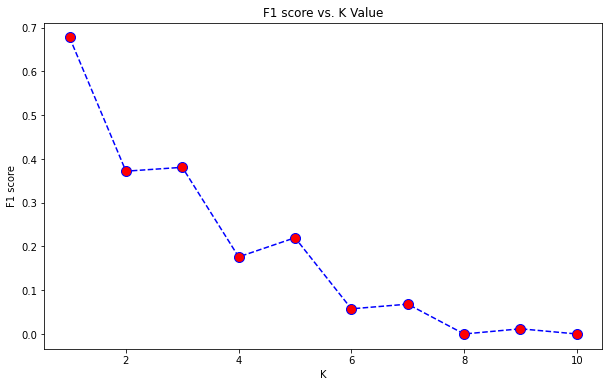

In [50]:
#Plot f1 score achieved with dif kNN from 1 to 10, using non-scaled, non-upsampled df
plot_f1_score(X_train, X_test, Y_train, Y_test)

We can identify a clear pattern: the less nearest neighbors we use to predict the target, the higher the score. Since class imbalance can be biasing the results (a model that always predicts "0" as a result would have a great performance regardless of the input features), we will fix this issue and re-asses f1 score.

### Improve the model quality
Now, we will fix the class imbalance using upsampling and re-assess the quality of the models using the F1 score:

**Upsampling: repeating the samples with the rarest class result (received insurance=1)**

Upsampling is performed in several steps:

Split the training sample into negative and positive observations;

Duplicate the positive observations several times;

Create a new training sample based on the data obtained;

Shuffle the data: identical questions following one another will not help the training.

First we'll assess the model without scaling the data, and then using a scaled dataset

In [51]:
#Define function to upsample

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [52]:
#check percentage of each class in the df
df['insurance_benefits_received'].value_counts()/len(df)

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64

In [53]:

#Upsample, increasing the repetiton of positive answers by 8 (note above that the ratio is 9:1)
features_upsampled, target_upsampled = upsample(
    X_train, Y_train, 8
)


In [54]:
#check percentage of each class in the train df after upsampling
target_upsampled.value_counts()/len(target_upsampled)

1    0.513237
0    0.486763
Name: insurance_benefits_received, dtype: float64

Max F1 score: 0.67 at K = 1


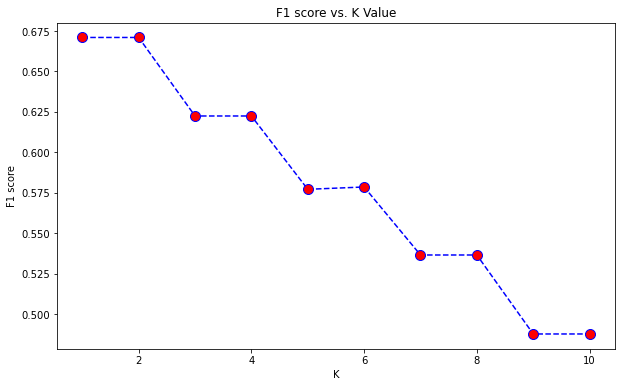

In [55]:
#Plot f1 score achieved with dif kNN from 1 to 10, using non-scaled, upsampled df
plot_f1_score(features_upsampled, X_test, target_upsampled , Y_test)

Even though the f1 score seems to have improved for k>1, the highest score was the same as the one achieved using an imbalanced train set. Taking that into account, we'll try out the performance of the model using a scaled dataset.

### Scaled dataset

Finally, we'll assess the performance of the model with the scaled df:

a) Before upsampling.

b) With upsampled data.


Max F1 score: 0.92 at K = 1


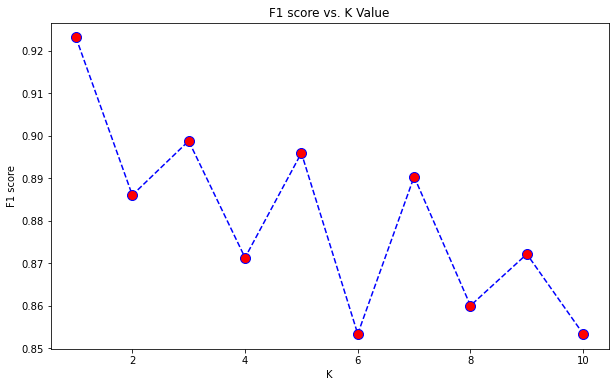

In [56]:
#Plot f1 score achieved with dif kNN from 1 to 10, using scaled, non-upsampled df
plot_f1_score(X_train_scaled,X_test_scaled, Y_train , Y_test)

By looking at the F1 scores chart above, we can draw two conclusions:

1) The model performs better with odd k values (note that as the target is binary, only when using odd k nearest neighbors we get more votes for one value).

2) The highest f1 score achieved is greater than with the non-scaled df (0.68 vs 0.92).

Now we'll upsample the scaled df to fix class imbalance and assess the results again.


In [57]:
#print overview
X_train_scaled

,gender,age,income,family_members
2365,1.0,0.338462,0.495989,0.166667
1627,0.0,0.707692,0.562834,0.333333
2618,0.0,0.353846,0.556150,0.000000
4138,0.0,0.476923,0.625668,0.000000
4753,1.0,0.276923,0.438503,0.166667
...,...,...,...,...
3497,1.0,0.353846,0.377005,0.166667
3492,0.0,0.461538,0.450535,0.166667
2177,1.0,0.307692,0.386364,0.166667
3557,1.0,0.507692,0.518717,0.166667


In [58]:

#Upsample, increasing the repetiton of positive answers by 8 (note above that the ratio is 9:1)
features_upsampled_scaled, target_upsampled_scaled = upsample(
    X_train_scaled, Y_train, 8
)


Max F1 score: 0.94 at K = 3


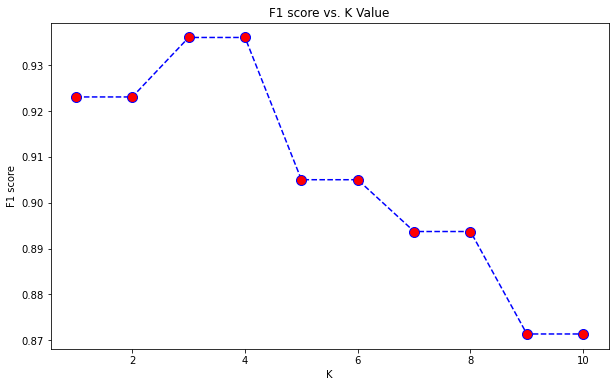

In [59]:
#plot f1 score using the scaled upsampled df

plot_f1_score(features_upsampled_scaled, X_test_scaled, target_upsampled_scaled, Y_test)

Undoubtedly, the way to get the model to achieve the best performance is using a scaled, upsampled dataset, and making predictions based on the 3 or 4 nearest neighbors.

## Task 2.b) Evaluate if the kNN Classifier can do better than a dummy model

With insurance_benefits being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$


In [60]:
#Define function to get F1 score and confusion matrix from comparing target and predictions
def eval_classifier(y_true, y_pred):
    
    ''' Takes ML predictions and real targets and returns 
    the f1 score and confusion matrix achieved '''
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [61]:
# generating output of a random model

    
def rnd_model_predict(P, size, seed=42):
    
    ''' Gerenerates the output of the required size for a random model
    with a P probability of returning a True value (binary classification task)'''

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [62]:
#Print the f1 score and confusion matrix from the dummy model when Probability of receiving an insurance benefit is 0,
#real % from the df, 0.50 and 1.

#loop through 4 different probabilities of customers receiving an insurance benefit
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:
    
    #Print f1 score and confusion matrix for the results achieved by each random model
    
    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df), seed=42)  
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



In [63]:
#Track the performance of the dummy model (with a probability equal to the 
#real % of received_insurance=1 from the train set )

y_pred_rnd = rnd_model_predict(Y_train.sum()/len(Y_train), len(Y_test), seed=42)  

eval_classifier(Y_test, y_pred_rnd)

F1: 0.16
Confusion Matrix
[[0.78350515 0.10103093]
 [0.09621993 0.01924399]]


In [64]:
#Now evaluate the performance of the best kNN Classifier built above

#define model
model= KnnClassifier(k=3)

#fit train set
model.fit(features_upsampled_scaled, target_upsampled_scaled)

#make predictions
Y_pred=model.predict(X_test_scaled)

#print f1 score and confusion matrix 

eval_classifier(Y_test, Y_pred)

F1: 0.94
Confusion Matrix
[[0.8742268  0.01030928]
 [0.004811   0.11065292]]


Definetly the performance of the kNN classifier using 3 nearest neighbors, and the scaled upsampled dataset is much better than a dummy model making random predictions with the same probability of paying an insurance benefit as the one from the train target.

Not only the true positives and true negatives are higher, also the false positives and negatives are lower.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, we will evaluate what RMSE would be for a Linear Regression model.

We'll build out own implementation of Linear Regression. 

Then we'll check RMSE for both the original data and the scaled one and see if there're any difference in RMSE between these two cases.

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [65]:
#Create LR implementation class
class MyLinearRegression:
    
    def __init__(self):
        #placeholder for weights
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        #Calculate weights 
        #1-The transposed feature matrix is multiplied by itself.
        #2-The matrix inverse to that result is calculated.
        #3-The inverse matrix is multiplied by the transposed feature matrix.
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y) 
        
        #split weights into:
        #w0 
        self.w0 = self.weights[0]
       
        #w1 to n
        self.w = self.weights[1:]

    def predict(self, X):
        

        y_pred = X.dot(self.w) + self.w0
        
        return y_pred

In [66]:
#define function to get the RMSE and R2 score of predictions
def eval_regressor(y_true, y_pred):
    
    rmse =(sklearn.metrics.mean_squared_error(y_true, y_pred))**0.5
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = (sklearn.metrics.r2_score(y_true, y_pred))**0.5
    print(f'R2: {r2_score:.2f}')    

In [67]:
#print weights, RMSE & r2 score

X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


Now let's print out RMSE & r2 score when using scaled data

In [68]:
#print weights, RMSE & r2 score

X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


We see that RMSE and R2 didn't change, because the model adjusted the weights instead. Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately, so the result achieved is deemed satisfactory.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.



In [69]:
#create list with names of columns containing personal info
personal_info_column_list = ['gender', 'age', 'income', 'family_members']

#create df with personal info to mask
df_pn = df[personal_info_column_list]

In [70]:
#convert df into an array
X = df_pn.to_numpy()

In [71]:
#print first five observations
X[:5]

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       [0.00e+00, 2.10e+01, 4.17e+04, 2.00e+00],
       [1.00e+00, 2.80e+01, 2.61e+04, 0.00e+00]])

Generating a random matrix $P$.

In [72]:
#generate random squared matrix of the size of X columns
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking the matrix $P$ is invertible

In [73]:
#see if we get an error when trying to get the inverse matrix
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [74]:
#Check that P x 1/P = Identity matrix
inverse_P=np.dot(P, np.linalg.inv(P))
inverse_P

array([[ 1.00000000e+00, -1.14337421e-16, -7.58122972e-17,
         1.89091165e-17],
       [ 8.51680974e-17,  1.00000000e+00, -7.10568689e-17,
         1.47898982e-16],
       [-4.34608597e-19, -8.01461326e-17,  1.00000000e+00,
         1.93902515e-17],
       [ 1.20295083e-16, -3.05630046e-16, -1.91527957e-16,
         1.00000000e+00]])

In [75]:
#get obfuscated data
obf_data= np.dot(X,P)

Let's see if we can guess the customers' ages or income after the transformation

In [76]:
#print first five observations
obf_data[:5]

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       [ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753]])

At a glance, we realize it'd be almost impossible to get the original data back from the obsfuscated data.

Now, we'll try to recover the original data from $X'$ provided that we know $P$? 

The idea is to try to check that by moving $P$ from the right side of the formula above to the left one. 

In [77]:
#Multiply obftuscated matix by the inverse of P
X_guess= np.dot(obf_data,np.linalg.inv(P))


Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [78]:
X[:5]

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       [0.00e+00, 2.10e+01, 4.17e+04, 2.00e+00],
       [1.00e+00, 2.80e+01, 2.61e+04, 0.00e+00]])

In [79]:
P[:5]

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [80]:
obf_data[:5]

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       [ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753]])

In [81]:
np.linalg.inv(P)[:5]

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [82]:
X_guess[:5]

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 6.66555413e-13,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 3.84747671e-13,  2.90000000e+01,  2.10000000e+04,
         1.41940791e-12],
       [-2.69875101e-12,  2.10000000e+01,  4.17000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  2.61000000e+04,
         4.91751442e-13]])

We can notice that some values are not exactly the same as they are in the original data.

Moreover, the mismatches take place at those positions where the original data had a value close to 0, and is most likely due to decimal precision operated by NumPy calculations

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. 

Our next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same as the model would adjust the weights to fit the new values.

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

If we simplify the formula for $w_P$ above, this means $w$ and $w_P$ would be linked as:

1) Distribute T exponents -> $(AB)^{-1} = B^{-1}A^{-1}$ :

$$ w_P =  (P^TX^TXP)^{-1} X^TP^T y $$

2) Distribute -1 exponent:

$$ w_P =  P^{-1}P^{-T}P^T(X^TX)^{-1}  X^T y $$

3) Offset inverse matrices [Remove $(P^{-T} ; P^T $] (as we know it's an invertible matrix, and their product is the identity matrix, which when multiplied by any other matrix returns the same matrix):


$$ w_P =  P^{-1}(X^TX)^{-1}  X^T y $$

4) Recall that $w = (X^T X)^{-1} X^T y$


5) Replacing  $(X^T X)^{-1} X^T y$ by $w$ in $w_P$ we have :

$$w_P = P^{-1} w$$


What this means for the quality of linear regression if we measure it with RMSE is that the result achieved should remain the same as with the original dataset, as predictions made by the algorithm will remain the same:

$$(X) w = (XP) w_P$$

Replacing $w$ and $w_P:$ $$(X)  (X^T X)^{-1} X^T y  = (XP)   P^{-1}(X^TX)^{-1}  X^T y $$

Regrouping: $$  (X^T X)^{-1} (X^TX) y  = PP^{-1}(X^TX)^{-1}  (X^TX) y $$

Removing inverse matrices [$(X^T X)^{-1}$ & $(X^TX)$] and [$P$ & $P^{-1}$]: $$ y  =  y $$



## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation. Coming up we will:

1) Build a procedure or a class that runs Linear Regression optionally with the obfuscation. 

2) Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Analyze if there are any differences.

**1) Procedure**

- Create a square matrix $P$ of random numbers (We have already defined it in previous steps)
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix. (We have already checked this in previous steps)
- Multiply the original data by P to get the obfuscated matrix $XP$
- Use $XP$ as the new feature matrix

In [83]:
#Print out the obfuscated matrix first five observations

obf_data[:5]

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       [ 5345.60393712, 18803.22720286, 15479.14837264, 38663.06186284],
       [ 3347.17673462, 11782.82928336,  9699.99894205, 24211.27337753]])

In [84]:
#Merge to a new df including target
df_obf_x= pd.DataFrame(obf_data, columns=personal_info_column_list)
df_obf= pd.concat([df_obf_x, pd.DataFrame(df['insurance_benefits'])],axis=1)
df_obf                   

,gender,age,income,family_members,insurance_benefits
0,6359.715273,22380.404676,18424.090742,46000.696690,0
1,4873.294065,17160.367030,14125.780761,35253.455773,1
2,2693.117429,9486.397744,7808.831560,19484.860631,0
3,5345.603937,18803.227203,15479.148373,38663.061863,0
4,3347.176735,11782.829283,9699.998942,24211.273378,0
...,...,...,...,...,...
4842,4577.581382,16107.740932,13259.688205,33107.974380,0
4843,6717.000247,23634.217067,19456.138634,48589.438841,0
4844,4346.223425,15289.241265,12586.162644,31433.508886,0
4845,4194.093242,14751.991024,12144.029306,30323.887634,0


In [85]:
#split into train and test features and target

X_obf= df_obf[personal_info_column_list]
Y_obf= df_obf['insurance_benefits']

X_train_obf, X_test_obf, Y_train_obf, Y_test_obf = train_test_split(X_obf, Y_obf, test_size=0.30, random_state=12345)


In [86]:
#Define LR model
lr_obf = MyLinearRegression()

#fit obf train data

lr_obf.fit(X_train_obf, Y_train_obf)
print(lr_obf.weights)

y_test_obf_pred = lr_obf.predict(X_test_obf)
eval_regressor(Y_test_obf, y_test_obf_pred )

[-0.97736673 -0.0572341  -0.01932331  0.10398897 -0.02430271]
RMSE: 0.36
R2: 0.66


In [87]:
#Print results with scaled original df again

X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


As concluded in the previous step, RMSE and R2 did not change as compared to the ones achieved in Task 3 (using either the scaled or non-scaled original dataset). We see that the model adjusted the weights instead.

# Conclusions

After importing data and fixing some issues detected we drew a pair plot and a heatmap to try to identify patterns in the correlation between insurance benefits received and the rest of the features. Since it was too difficult to spot obvious clusters, we decided to introduce ML for solving the tasks we had committed to.




### TASK 1) Similar Customers

We developed a model that takes a dataframe,  an $n^{th}$ observation number, the k Nearest neighbors we want to get and the metric throughout which we want to calculate distance (euclidean or manhattan). We used it to get the 10 nearest neighbors for the 3rd item of the dataset both with scaled and non-scaled data. 

**We noticed that when the data is not scaled, differences in columns which observations range within higher values have more impact in total distance, so it's best to have it scaled to get a weighted distance between datapoints.**

As for metrics, even though there are some differences in the position at which the last rows are returned (meaning that if we printed out the top 8 closest neighbors instead of 10, we'd have some differences), the 10 closest records returned are the same for both metrics.

### TASK 2) Likelyhood of a customer receiving any Insurance benfit.

#### 2a) Optimal kNN :

After adding a calculated column set to 1=True if the customer had one or more benefits, or to 0=False otherwise, we built a custom ML class capable of returning a prediction based on the target value with the majority of votes among the k nearest neighbors. We plotted the F1 score achieved with k = 1 to 10, and concluded that:

**The kNN Classifier model performs best with scaled, upsampled (class imbalance fix) data, using the 3 or 4 nearest neighbors for making predictions, achieving a 0.94 F1 score**

#### 2b) Evaluation against a dummy model

When compared to the f1 score reached by a dummy model returning "1" with some probability, we realized that the kNN performs much better (0.21 max f1 score achieved).

**Not only the true positives and true negatives returned by the kNN classifier were higher, also the false positives and negatives were lower**

### TASK 3) Linear regression to predict count of insurance benefits a customer is likely to receive.

We built a linear regressor and calculated the RMSE and R2 score of the predictions using the scaled and non-scaled dataset. The results were the same for both, because the linear regressor adjusted the weights to make the same predictions: RMSE=0.36 and R2= 0.66.

Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately, so the result achieved of 0.36 is deemed satisfactory.

As for the Coefficient of determination (R2), the higher the R-squared, the better the model fits data. We can interpret it as the opposite of the RMSE (0.36 + 0.66= 0.99 -> =1), meaning that a 66% fit is high enough.

### Task 4. Obfuscating Data

We masked customers' personal information multiplying the original values by a random matrix and, as we managed to prove analytically through formulas, the RMSE and R2 scores achieved by the Linear Regressor using obfuscated data, scaled data or original data did not change, as predictions made by the model were the same in both scenarios.



# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>